# Homework 1 | Clustering Part

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Initialization

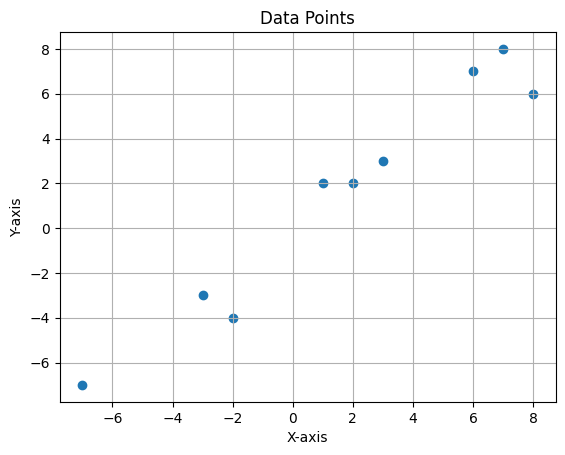

In [2]:
# define list of points
points = np.array([
    [1, 2],
    [3, 3],
    [2, 2],
    [8, 6],
    [7, 8],
    [6, 7],
    [-3, -3],
    [-2, -4],
    [-7, -7],
])

# plot points
plt.scatter(points[:, 0], points[:, 1])
plt.title("Data Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()

In [5]:
# define functions
def assign_clusters(points, centroids):
    clusters = []
    for point in points:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


def update_centroids(points, centroids, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = points[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = centroids[i]
        new_centroids.append(new_centroid)
    return np.array(new_centroids)


def plot_centroids_movement(
    points,
    clusters,
    iteration,
    new_centroids,
    old_centroids=None,
    show_fig=True,
    save_fig=True,
    save_path="../images/centroid_movement"
):
    plt.figure()
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap="viridis", marker="o")
    
    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1], c="blue", marker="o", s=50, label="Old Centroids")
        
        for old, new in zip(old_centroids, new_centroids):
            plt.plot([old[0], new[0]], [old[1], new[1]], color="gray", linestyle="--")
    
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c="red", marker="X", s=50, label="New Centroids")
    plt.title(f"Centroid Movement - Iteration {iteration}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    
    if save_fig:
        plt.savefig(save_path + f"_iter_{iteration}.png")
    
    if show_fig:
        plt.show()


def run_kmeans(
    points,
    initial_centroids,
    max_iters=10,
    show_fig=True,
    save_fig=True,
    save_path="../images/centroid_movement"
):
    centroids = initial_centroids
    k = len(centroids)
    
    plot_centroids_movement(
        points,
        assign_clusters(points, centroids),
        0,
        new_centroids=centroids,
        show_fig=show_fig,
        save_fig=save_fig,
        save_path=save_path
    )
    print(f"Initial Centroids: \n{centroids}")
    
    for i in range(max_iters):
        clusters = assign_clusters(points, centroids)
        print(f"Iteration {i+1}: Cluster assignments \n{clusters}")
        
        new_centroids = update_centroids(points, centroids, clusters, k)
        plot_centroids_movement(
            points,
            clusters,
            i + 1,
            new_centroids=new_centroids,
            old_centroids=centroids,
            show_fig=show_fig,
            save_fig=save_fig,
            save_path=save_path
        )
        centroids = new_centroids
        
        print(f"Iteration {i+1}: Centroids updated to \n{centroids}")
        
        if np.all(centroids == new_centroids):
            plot_centroids_movement(
                points,
                clusters,
                i + 2,
                new_centroids=new_centroids,
                show_fig=show_fig,
                save_fig=save_fig,
                save_path=save_path
            )
            break
    
    print(f"Final Centroids: \n{centroids}")
    return centroids, clusters

---

## T5.

Initial Centroids: 
[[ 3  3]
 [ 2  2]
 [-3 -3]]
Iteration 1: Cluster assignments 
[1 0 1 0 0 0 2 2 2]
Iteration 1: Centroids updated to 
[[ 6.          6.        ]
 [ 1.5         2.        ]
 [-4.         -4.66666667]]
Final Centroids: 
[[ 6.          6.        ]
 [ 1.5         2.        ]
 [-4.         -4.66666667]]


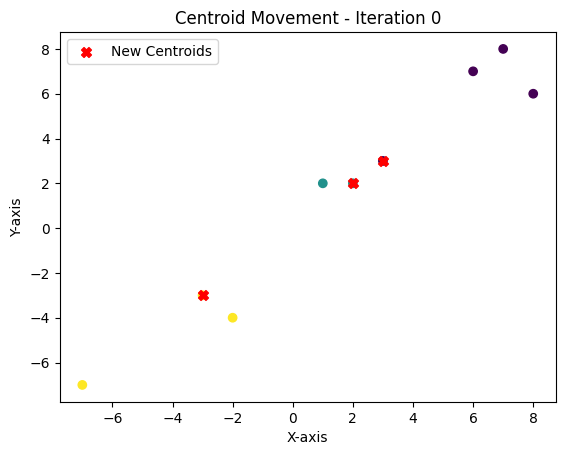

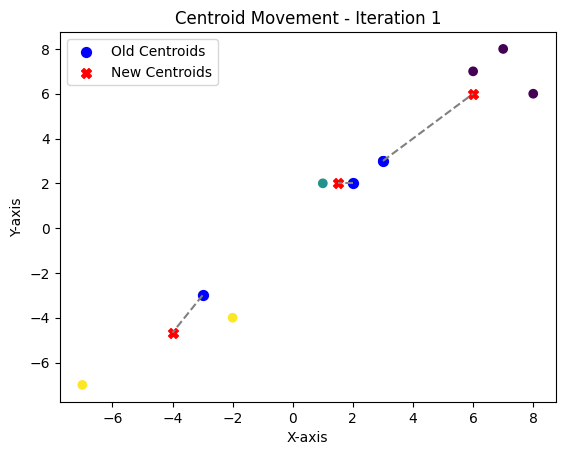

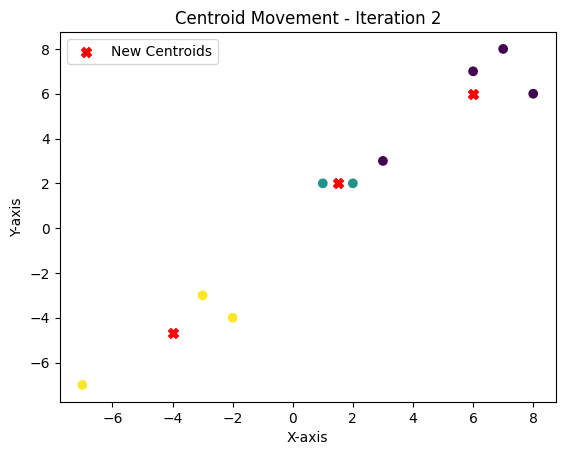

In [6]:
# define starting centroids
centroids = np.array([
    [3, 3],
    [2, 2],
    [-3, -3],
])

# k-means algorithm
final_centroids, final_clusters = run_kmeans(
    points, centroids, max_iters=5, show_fig=False, save_path="../images/centroid_movement_T5"
)

## T6.

Initial Centroids: 
[[-3 -3]
 [ 2  2]
 [-7 -7]]
Iteration 1: Cluster assignments 
[1 1 1 1 1 1 0 0 2]
Iteration 1: Centroids updated to 
[[-2.5        -3.5       ]
 [ 4.5         4.66666667]
 [-7.         -7.        ]]
Final Centroids: 
[[-2.5        -3.5       ]
 [ 4.5         4.66666667]
 [-7.         -7.        ]]


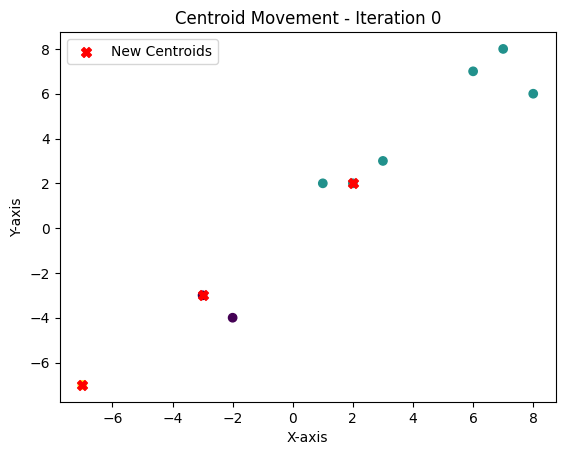

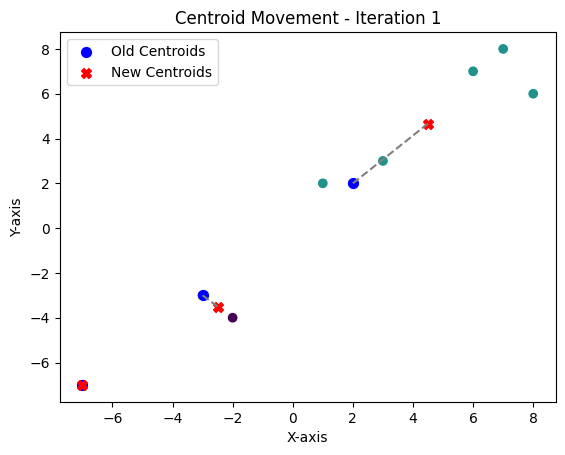

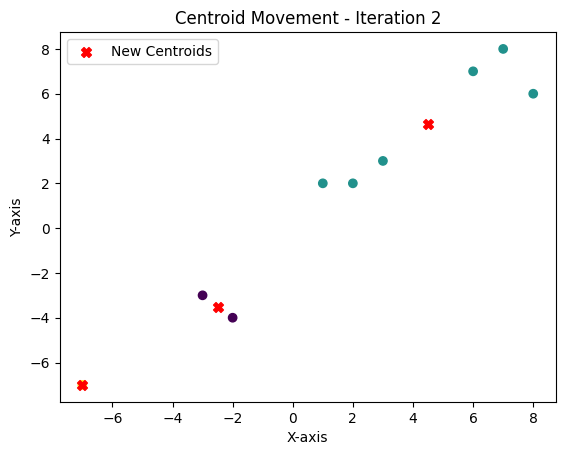

In [7]:
# define starting centroids
centroids = np.array([
    [-3, -3],
    [2, 2],
    [-7, -7],
])

# k-means algorithm
final_centroids, final_clusters = run_kmeans(
    points, centroids, max_iters=5, show_fig=False, save_path="../images/centroid_movement_T6"
)